# SVR & XGbOOST

In [1]:
!pwd

/home/cccr/supriyo/panini/filtered_data/historical/JGRJD/SVR


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import hilbert_data1_panini_20CRV3_3bpass


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier, plot_tree, XGBRegressor
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
#import hilbert_data 

### Test and Train Splitter:

In [3]:
x_train,_,y_train= hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(1974,6,1),datetime.datetime(1978,3,16))
x_test2,_,y_test2 = hilbert_data1_panini_20CRV3_3bpass.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))

In [4]:
#x_test = pd.concat([x_test1,x_test2],axis=0)
#y_test = pd.concat([y_test1,y_test2],axis=0)

In [5]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
#y_train.head()

(10839, 72) (10839, 1) (1266, 72) (1266, 1)


In [6]:
# x_train[(x_train < -500.0)] = -500.0
# x_train[(x_train > 500.0)]  = 500.0

#### Historical pressure

In [9]:
x_test3 = hilbert_data1_panini_20CRV3_3bpass.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))

# x_test3[(x_test3 < -500.0)] = -500.0
# x_test3[(x_test3 > 500.0)]  = 500.0
# #x_test3['doy'] = x_test3.index.dayofyear

# #x_test3['max'] = x_test3.iloc[:,0:12].max(axis=1)
# #x_test3['min'] = x_test3.iloc[:,0:12].min(axis=1)
# #x_test3['std'] = x_test3.iloc[:,0:12].std(axis=1)
# x_test3.shape

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'RMM1')

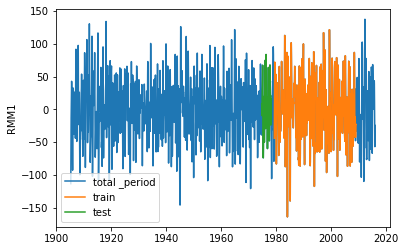

In [10]:
plt.plot(x_test3.iloc[:,0],label = 'total _period')
plt.plot(x_train.iloc[:,0], label = 'train')
plt.plot(x_test.iloc[:,0], label = 'test')
plt.legend()
plt.ylabel('RMM1')

#### scale the data

In [11]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_test3[:])

test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])
test_x2  = sc5.transform(x_test2[:])



sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)
test_y2  = sc3.transform(y_test2)

train_x.max(),test_x.max(),test_x3.max(),train_y.max(),test_y.max()

(1.1097374269271416,
 1.6078178156538698,
 1.0000000000000002,
 0.9999999999999999,
 0.8836939198705787)

(array([2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
        2.0000e+00, 2.0000e+00, 8.0000e+00, 1.4000e+01, 1.4100e+02,
        3.0200e+02, 1.0500e+03, 2.4250e+03, 5.1330e+03, 9.3880e+03,
        1.3265e+04, 1.5886e+04, 1.5523e+04, 1.1867e+04, 7.9600e+03,
        4.6300e+03, 2.3470e+03, 8.6400e+02, 2.5400e+02, 7.1000e+01,
        7.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([-0.49777278, -0.43761305, -0.37745332, -0.31729359, -0.25713385,
        -0.19697412, -0.13681439, -0.07665466, -0.01649493,  0.0436648 ,
         0.10382453,  0.16398426,  0.224144  ,  0.28430373,  0.34446346,
         0.40462319,  0.46478292,  0.52494265,  0.58510238,  0.64526211,
         0.70542185,  0.76558158,  0.82574131,  0.88590104,  0.94606077,
         1.0062205 ,  1.06638023,  1.12653997,  1.1866997 ,  1.24685943,
         1.30701916,  1.36717889,  1.42733862,  1.48749835,  1.54765808,
         1.

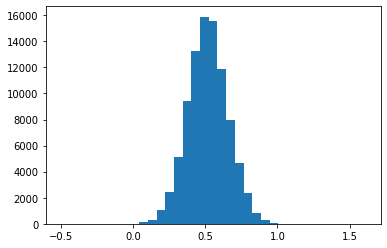

In [12]:
plt.hist(test_x.flatten(),bins=35)

### XGBOOST

In [26]:
model = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror'))

In [27]:
model.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [28]:
train_x.shape

(10839, 72)

#### Predict XGBOOST forest for rmm1

In [29]:
model.fit(train_x, train_y)

Y_prediction_rmm1 = model.predict(test_x)

acc_xgboost       = round(model.score(test_x, test_y) * 100, 2)

print("Accuracy of base Xgboost model is ,",acc_xgboost)

Accuracy of base Xgboost model is , 59.57


training shape = 
(10839, 1)


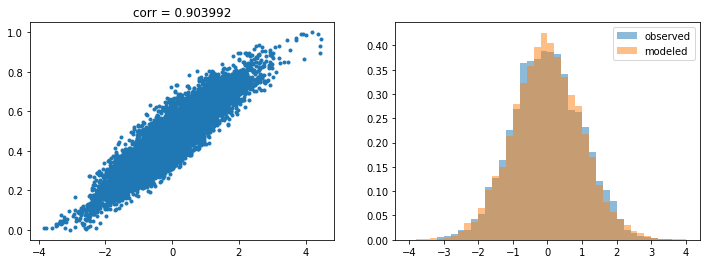

In [30]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(1266, 1)


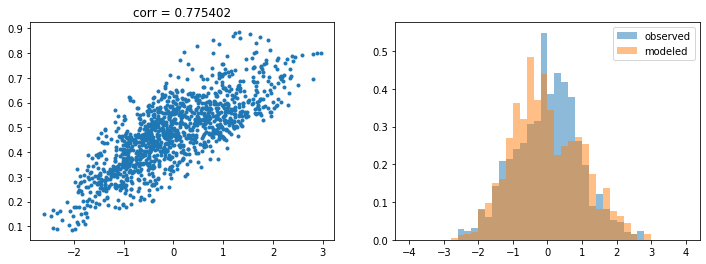

In [31]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

## Support vector regressor

In [32]:
from sklearn.svm import SVR# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.regressor = SVR(kernel='rbf')
regressor = SVR(kernel='rbf',gamma='auto',C=1)

regressor.fit(train_x, train_y)

Y_prediction_rmm1 = regressor.predict(test_x)

acc_svr       = round(regressor.score(test_x, test_y) * 100, 2)

print("Accuracy of base SVR model is ,",(acc_svr/100)**0.5)

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of base SVR model is , 0.8346256645946133


training shape = 
(10839,)


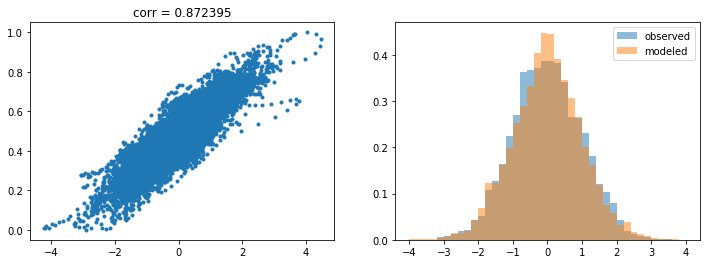

In [33]:
predict1   = regressor.predict(train_x)
yy_train   = sc3.inverse_transform(predict1[:,None])
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(1266,)


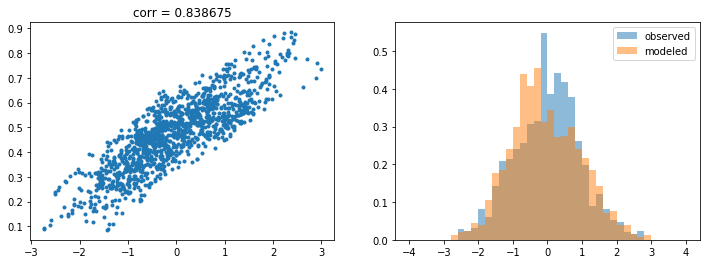

In [34]:
predict2  = regressor.predict(test_x)
yy_test   = sc3.inverse_transform(predict2[:,None])
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(2437,)


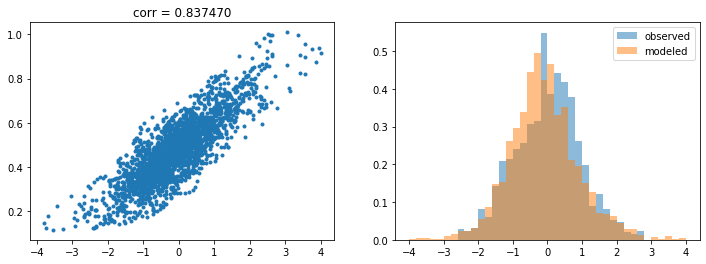

In [25]:
predict2  = regressor.predict(test_x2)
yy_test   = sc3.inverse_transform(predict2[:,None])
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y2[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y2,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [21]:
predict_tot = regressor.predict(test_x3)
predict_tot = sc3.inverse_transform(predict_tot[:,None])
A=sc3.inverse_transform(predict1[:,None])
predict_tot = predict_tot/A.std()


In [22]:
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_1905_2015_svr_org.txt')